## Goals
Show that $x$ is a function of $y$, or $y = f(x)$ for some function $f$.

## Analysis
If we collect data then we can form a matrix $Y = f(X)$. If $f$ is linear, we can say that for some matrix $A \in \mathbb{R}^{n \times p}$, $Y = AX$. 

If $n \ll p$, $x$ can not be solved with out additional assumptions on $x$.

We may choose a sparsity constraint via the convex relaxation, $\|x\|_1$. We also may choose the low energy regularizor, $\| x\|_2^2$. We will label this constraint as $r(x)$.

These are Lagrangian constrains, so we'll be solving the convex optimization

$$\hat{x} = \arg\min_x \|Y - AX \|_2^2 + \lambda r(x)$$

for some $\lambda > 0$.

## Simulation

In [1]:
import numpy as np
import time
import pandas as pd

In [9]:
def long_simulation(param1, param2):
    time.sleep((param1 + param2)/100)
    return param1 * param2 + np.random.randn()

In [10]:
data = []
param1 = np.linspace(0, 1, num=10)
param2 = np.linspace(0, 1, num=10)
for p1 in param1:
    for p2 in param2:
        for repeat in range(10):
            start = time.time()
            result = long_simulation(p1, p2)
            data += [{'param1': p1, 'param2': p2,
                      'time': time.time() - start,
                      'result': result}]

In [4]:
df = pd.DataFrame(data)
df.to_csv('example.csv')
df.head()

,param1,param2,result,time
0,0.0,0.0,-1.719570,0.000112
1,0.0,0.0,-0.748531,0.000021
2,0.0,0.0,-0.510489,0.000026
3,0.0,0.0,-0.804590,0.000023
4,0.0,0.0,0.403656,0.000007


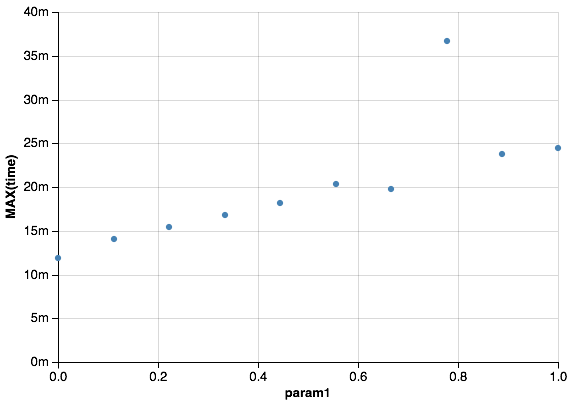

In [8]:
from altair import Chart
Chart(df).mark_circle().encode(
    x='param1', y='max(time)')